In [37]:
#Набор данных: Данные о клиентах магазина
#Источник: https://www.kaggle.com/datasets/datascientistanna/customers-dataset
#Характер данных: реальные

#Атрибуты(название атрибута в датасете - описание атрибута(тип данных атрибута)):
#Customer ID - уникальный идентификатор покупателя(Integer)
#Gender - пол покупателя(String)
#Age - возраст покупателя(Integer)
#Annual Income($) - годовой доход(Integer)
#Spending Score - оценка расходов, присвоенная магазином на основе поведения покупателя и характера расходов(Integer)
#Profession - профессия(String)
#Work Experience(in years) - опыт работы в годах(Integer)
#Family Size - размер семьи(Integer)

#Задача анализа данных: установить соответствие между атрибутами для определения портрета среднестатистического покупателя

import matplotlib.pyplot as plt
import pandas as pnd
import numpy as np
import seaborn as sns
import math

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

data_set = pnd.read_csv('Customers.csv')

print(data_set)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [38]:
#1.
#Пускай новый атрибут будет означать: количество деннег в год на одного члена семьи
data_set['Money per person'] = round(data_set['Annual Income ($)'] / data_set['Family Size'])
print(data_set)

columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Money per person']

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  Money per person  
0        Healthca

In [39]:
#2 Очистка data set
#Удаляем строки с null-значениями
#Исходя из результатов ЛР-1, null-значения содержатся только в стобце Profession, в данном случае, они являются неинформативными
#и от них можно избавиться
print(len(data_set.axes[0]))
data_set = data_set.dropna()
#Удаляем дубли
data_set = data_set.drop_duplicates()
print(data_set);
print(len(data_set.axes[0]))

2000
      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  Money per person  
0        Hea

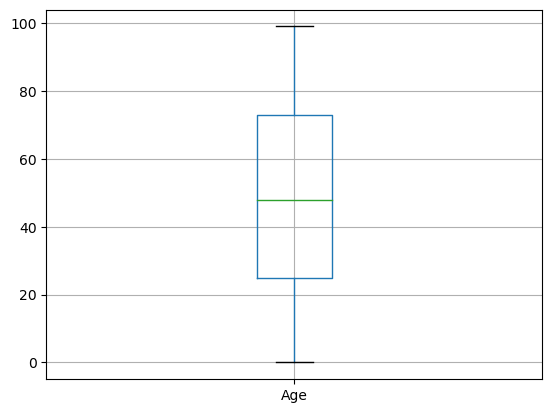

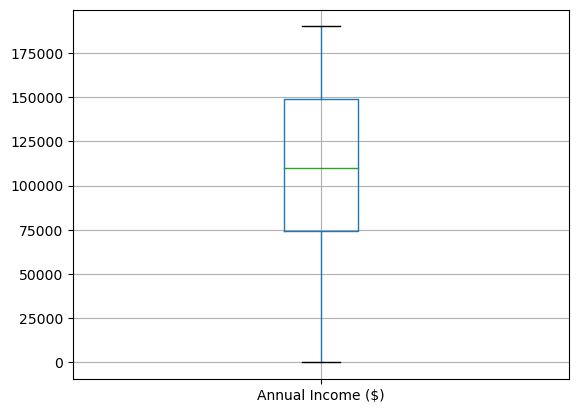

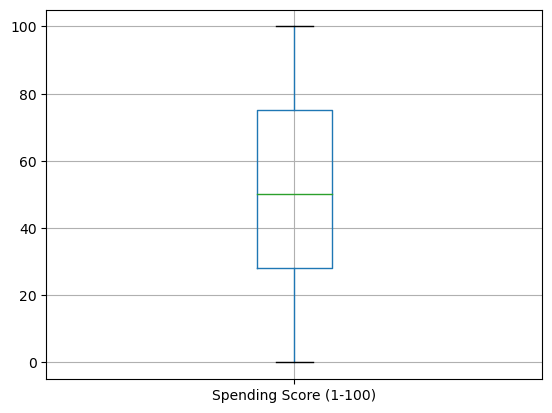

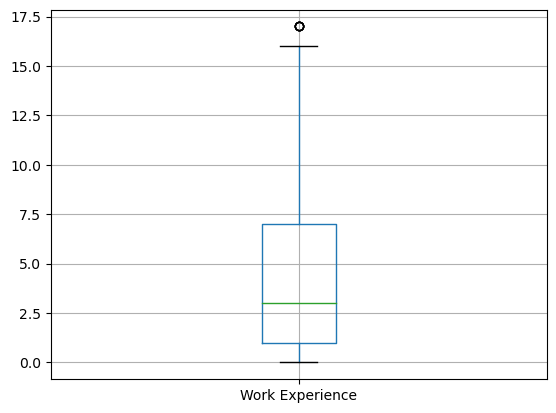

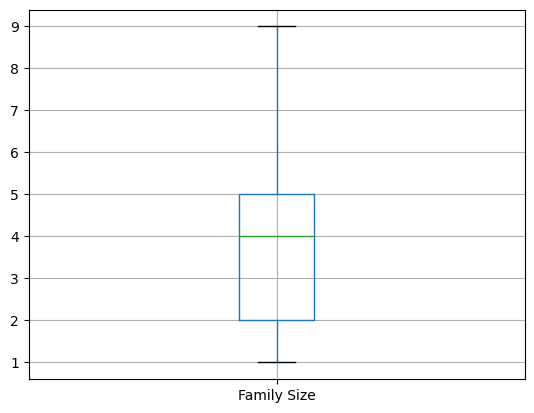

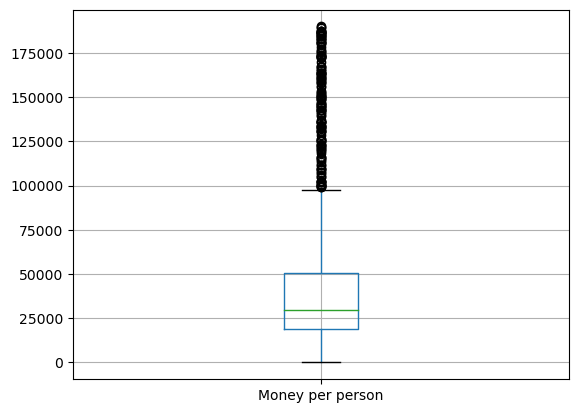

In [40]:
#2 Очистка data set
#Определение выбросов по коробочной диаграмме c помощью коробочной диаграммы
for col in columns:
    data_set.boxplot(column=[col])
    plt.show()
    
#Из коробчатых графиков четко можно наблюдать выбросы. Однако, в стобце

In [41]:
#Необходимо удалить выбросы из нашего датасета по столбцу work experience(значение больше ~ 16.0) и по столбцу Family size()
data_set = data_set[data_set['Work Experience'] <= 16.0]
data_set = data_set[data_set['Family Size'] <= 8]
print(data_set)

#Форматы данных и регистры одинаковы

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  Money per person  
0        Healthca

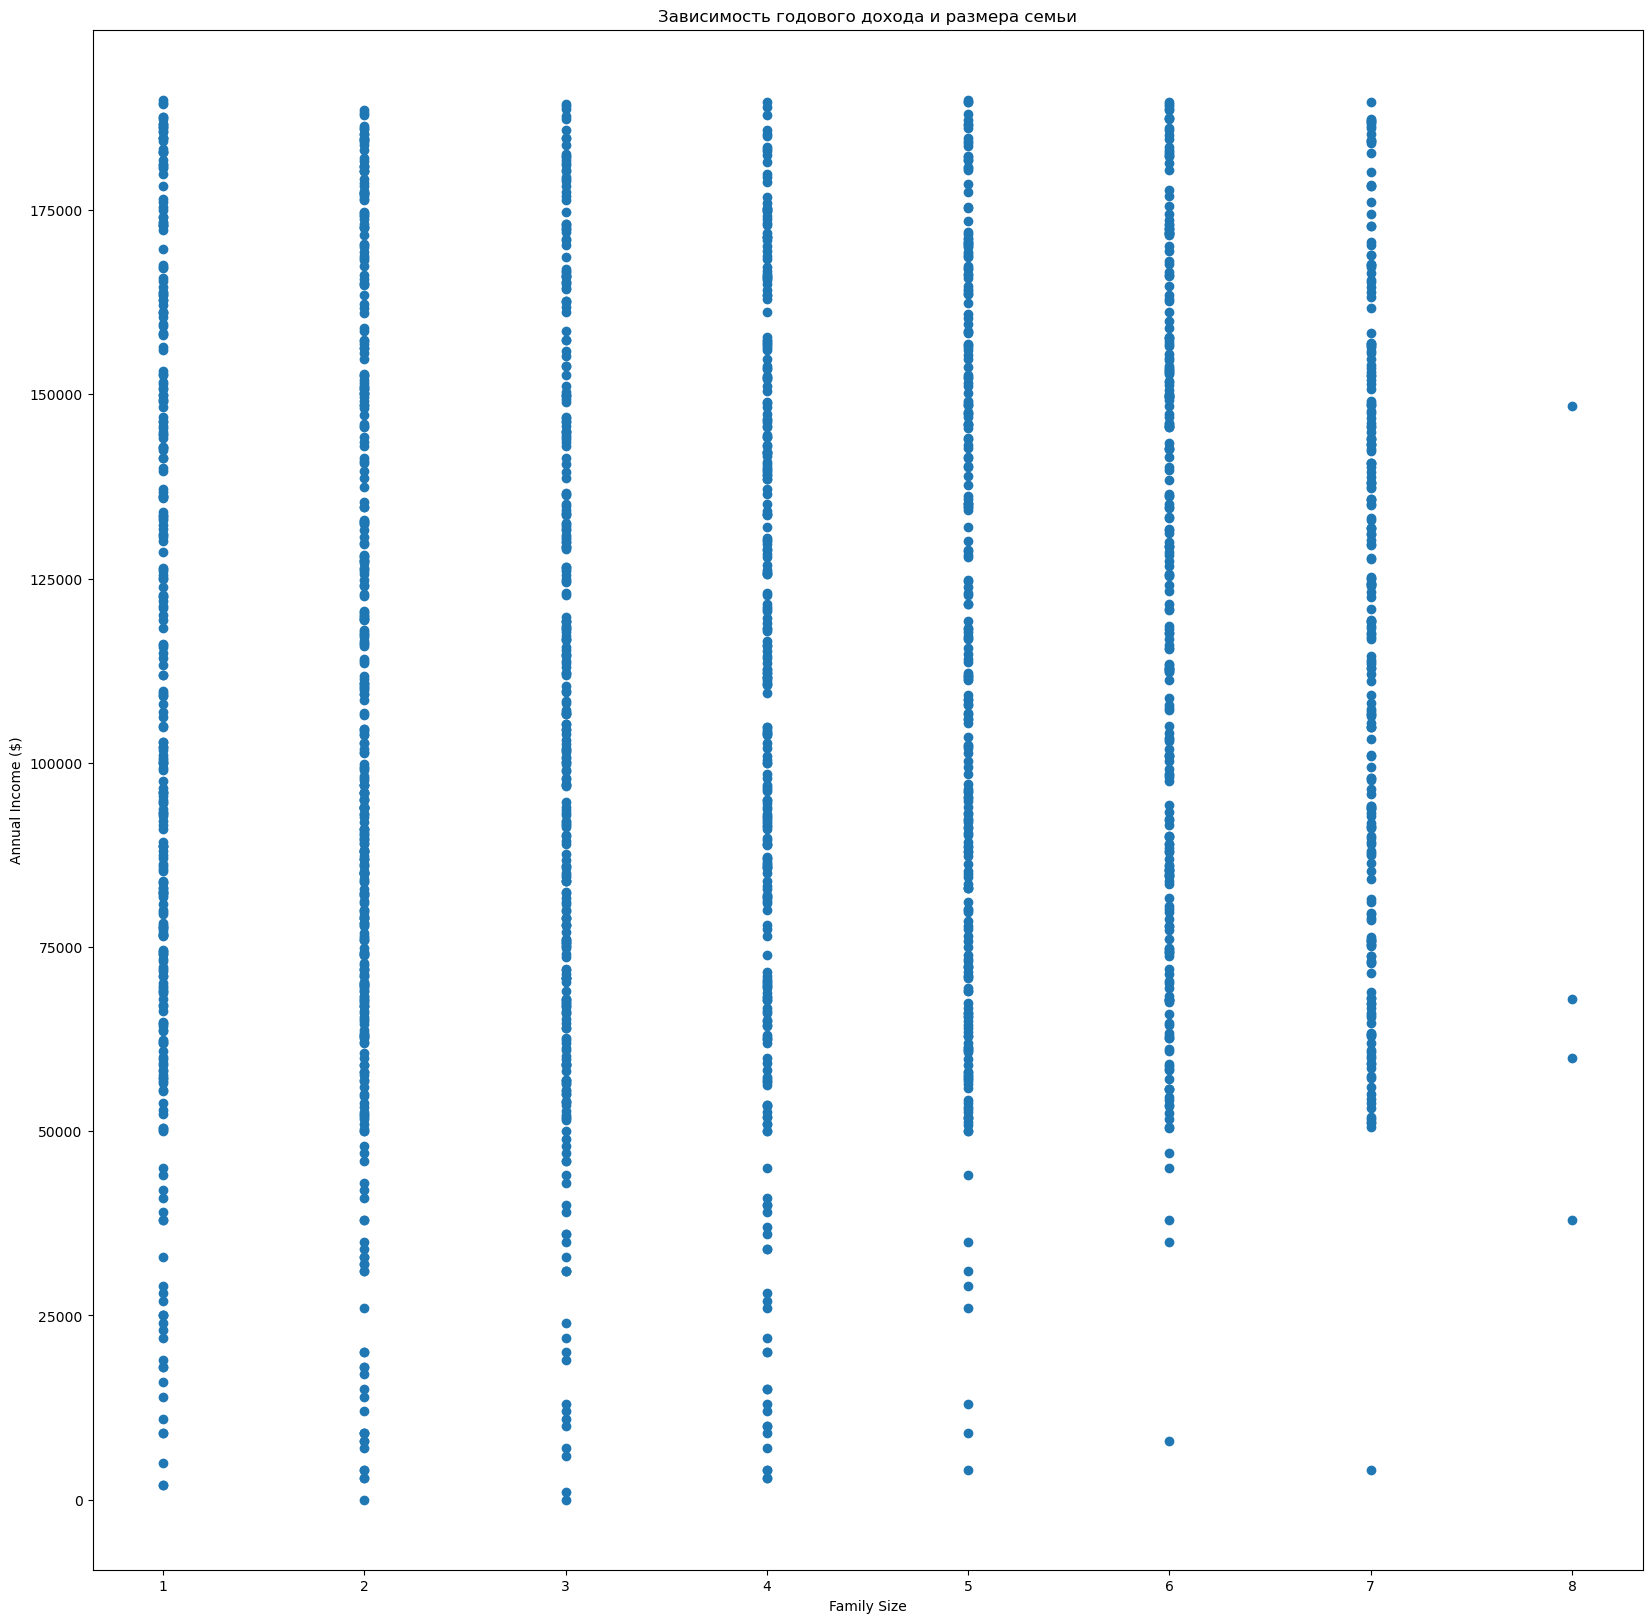

In [58]:
# Графика зависимости годового дохода и размера семьи
plt.figure(figsize=(20, 20))
plt.scatter(data_set['Family Size'], data_set['Annual Income ($)'])

plt.title('Зависимость годового дохода и размера семьи')
plt.ylabel('Annual Income ($)')
plt.xlabel('Family Size')
           
plt.show()
#По графику можно сделать вывод, что в среднем люди с размером семьи >= 5 получают в год
#больше денег, нежели люди с меньшим размером семьи 

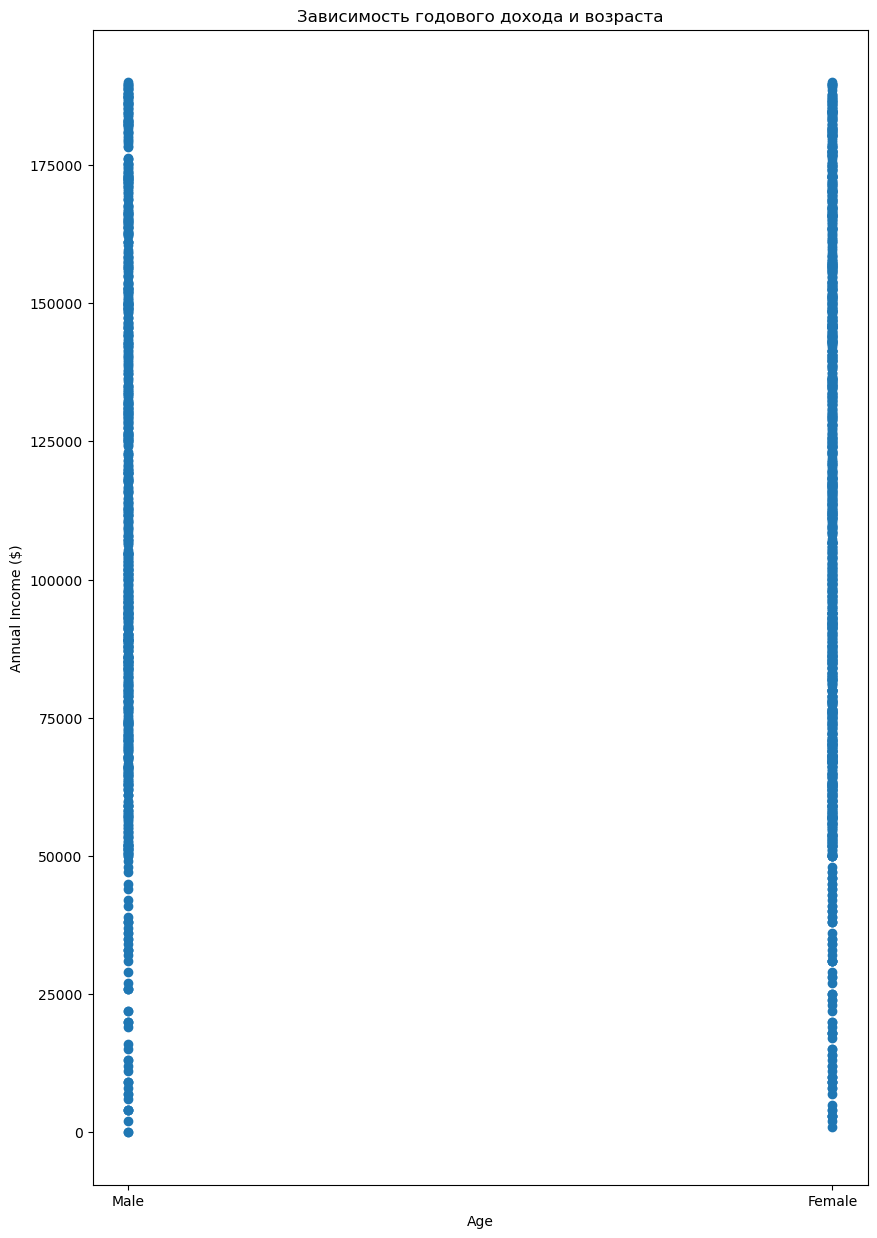

In [65]:
# Графика зависимости годового дохода и размера семьи
plt.figure(figsize=(10, 15))
plt.scatter(data_set['Gender'], data_set['Annual Income ($)'])

plt.title('Зависимость годового дохода и возраста')
plt.ylabel('Annual Income ($)')
plt.xlabel('Gender')
           
plt.show()
#По графику можно сделать вывод, что яркой зависимости годового заработка от пола нет.

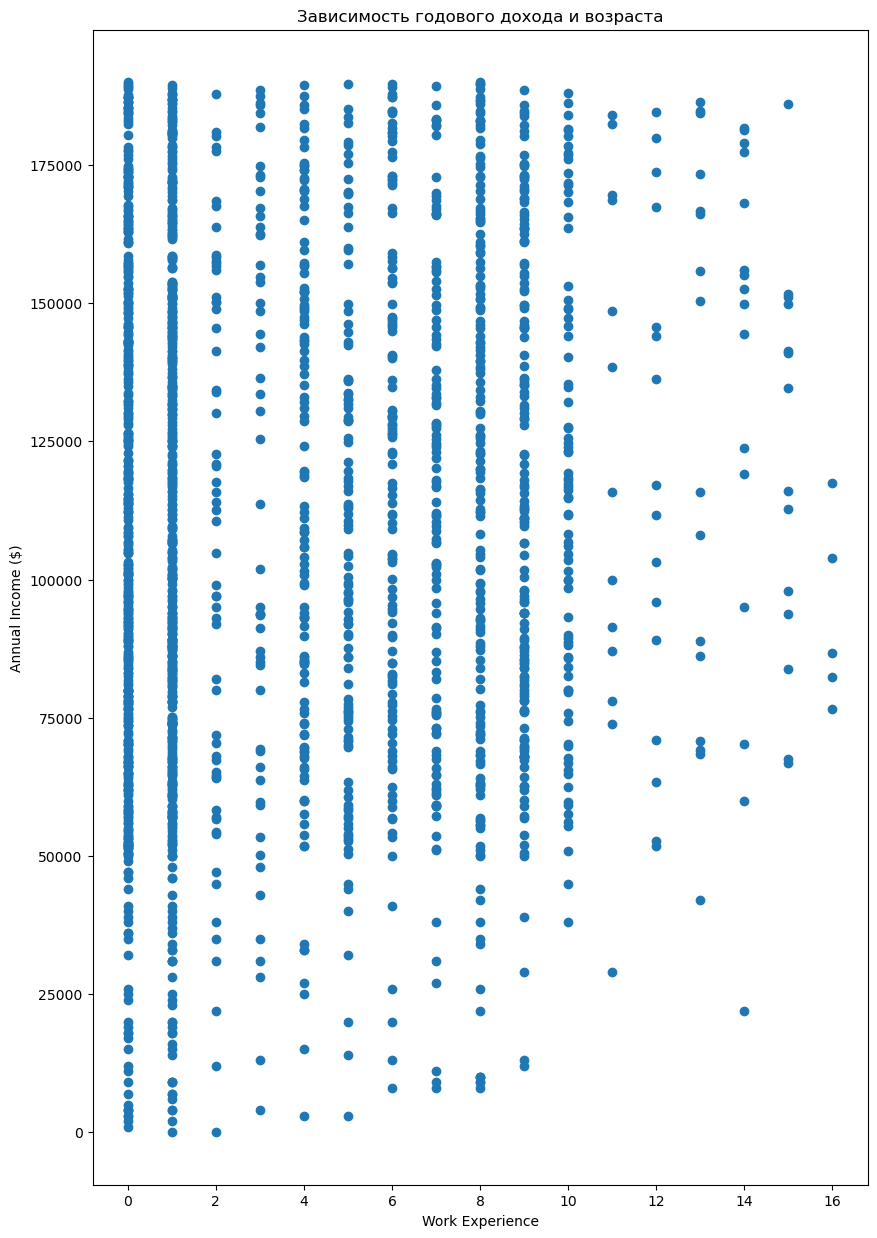

In [67]:
# Графика зависимости годового дохода и размера семьи
plt.figure(figsize=(10, 15))
plt.scatter(data_set['Work Experience'], data_set['Annual Income ($)'])

plt.title('Зависимость годового дохода и опыта работы')
plt.ylabel('Annual Income ($)')
plt.xlabel('Work Experience')
           
plt.show()
#По графику можно сделать вывод, что при большем стаже работы минимальый порог годового дохода увеличивается

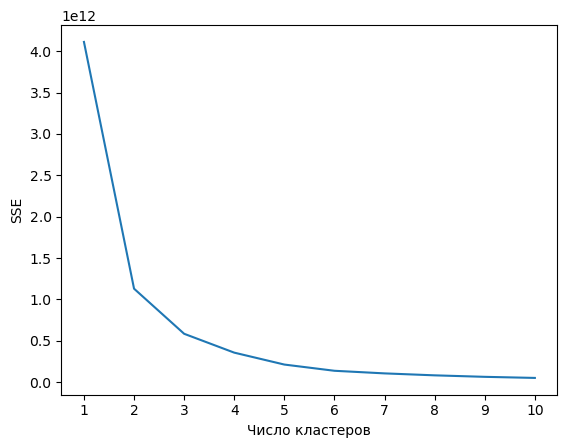

In [68]:
#параметры инициализации
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
X1 = data_set[['Family Size' , 'Annual Income ($)']].values
#сохраняем лист для SSE
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters = k , **kmeans_kwargs)
 kmeans.fit(X1)
 sse.append(kmeans.inertia_)

#визуализация
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Число кластеров")
plt.ylabel("SSE")
plt.show()

#мы можем опредилить оптимальное число кластеров по графику так: точка перегиба, после которого начинается почти
#горизонтальная линия будет являться оптимальным числом кластеров, в нашем случае - 4

In [69]:
#Вывод
#В ходе проведения исследования датасета из первой лабораторной работы я обработал датасет, удалив пустые значения, повторы и выбросы, 
#добавил новый атрибут, который описывал  количество деннег в год на одногос члена емьи. Он показал яркую зависимость дохода от числа членов семьи(чем выше, тем больше). 
#Так же я построил и описал графики интересующих и явнозаметных зависимостей одних переменных от других, по их итогам подвел вывод
#о наличии зависимости между параметрами. Так же опробовал метод кластеризации KMeans из пакета sklearn.